In [ ]:
# 6.3 使用scikit-learn提供的適應提升處理分類問題(AdaBoostClassifier)

In [1]:
# --- 第 1 部分 ---
# 載入函式庫與資料集
import numpy as np
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

digits = load_digits()
train_size = 1500
train_x = digits.data[:train_size]
train_y = digits.target[:train_size]
test_x = digits.data[train_size:]
test_y = digits.target[train_size:]
np.random.seed(123456)

# --- 第 2 部分 ---
# 初始化模型
ensemble_size = 1000
ensemble = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), # 輸入弱學習器
                              algorithm="SAMME",                   # 計算權重的方法 SAMME使用預測類別、SAMME.R使用預測機率
                              n_estimators=ensemble_size)          # 指定要訓練多少弱學習器;default=50

# --- 第 3 部分 ---
# 訓練模型
ensemble.fit(train_x, train_y)

# --- 第 4 部分 ---
# 評估模型
ensemble_predictions = ensemble.predict(test_x)

ensemble_acc = metrics.accuracy_score(test_y,ensemble_predictions)

# --- 第 5 部分 ---
# 顯示準確率
print('Boosting: %.2f' % ensemble_acc)


Boosting: 0.82


In [6]:
ensemble.estimator_weights_.shape 

(1000,)

In [9]:
ensemble.estimator_weights_ # 獲得每個若學習器的權重

array([0.81093022, 0.94317544, 0.93877184, 1.29098404, 1.58242907,
       1.16160676, 1.18974659, 1.41072893, 1.30894124, 1.18973637,
       1.31464872, 1.1771849 , 1.04361104, 1.25825689, 1.22443441,
       1.37872653, 1.22363053, 1.2068743 , 1.24342309, 1.1235359 ,
       1.29003823, 1.34067812, 1.27786734, 1.07843236, 1.15305379,
       1.22288889, 1.41999145, 1.08793506, 0.99384548, 1.3233484 ,
       1.19599431, 1.28638924, 0.92994935, 1.12179442, 1.22163688,
       1.24577316, 1.41871911, 1.25081437, 1.10041563, 1.10677149,
       1.0961356 , 1.22830883, 1.26601896, 1.09140009, 1.23767647,
       1.03932091, 1.23896934, 1.16144109, 0.9978525 , 1.23345288,
       1.01454201, 1.30842221, 1.12014844, 1.06538933, 1.15978828,
       1.25450883, 1.01404363, 1.00554398, 1.26420287, 1.2739042 ,
       0.98835555, 1.08507306, 0.97667961, 1.11208879, 1.09818935,
       1.12495424, 0.92786195, 1.17143693, 1.03124651, 1.04261961,
       0.92626044, 1.02740005, 1.00681424, 0.92604961, 0.87699

In [8]:
ensemble.estimator_errors_.shape

(1000,)

In [10]:
ensemble.estimator_errors_   # 獲得每個若學習器的誤差

array([0.8       , 0.778     , 0.77875964, 0.71223025, 0.64903394,
       0.73800358, 0.7325263 , 0.68707838, 0.70853579, 0.7325283 ,
       0.70735572, 0.73498033, 0.76017033, 0.71889109, 0.72567529,
       0.69391742, 0.72583529, 0.7291571 , 0.72187904, 0.74529777,
       0.71242406, 0.70193861, 0.71491112, 0.75376462, 0.73965396,
       0.72598285, 0.68508348, 0.75199663, 0.76912536, 0.70555161,
       0.7313004 , 0.71317107, 0.78027595, 0.74562821, 0.72623184,
       0.72140698, 0.68535792, 0.72039267, 0.74966172, 0.74846703,
       0.75046409, 0.72490333, 0.71731982, 0.75134985, 0.72303132,
       0.76095159, 0.72277234, 0.73803561, 0.76841306, 0.72387633,
       0.76542979, 0.70864296, 0.74594027, 0.75617743, 0.73835503,
       0.7196479 , 0.76551926, 0.7670415 , 0.71768792, 0.71571817,
       0.77009877, 0.75253   , 0.77215944, 0.74746465, 0.75007929,
       0.74502843, 0.78063362, 0.73609843, 0.76241726, 0.76035103,
       0.78090775, 0.7631133 , 0.76681444, 0.78094382, 0.78921

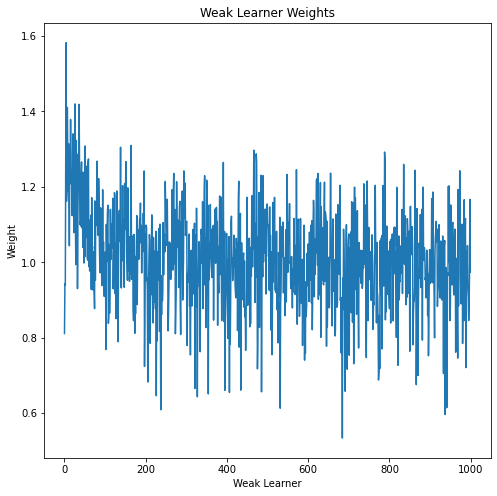

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 8))
plt.plot(list(range(len(ensemble.estimator_weights_))), ensemble.estimator_weights_)
plt.title("Weak Learner Weights")
plt.xlabel("Weak Learner")
plt.ylabel("Weight")
plt.show()